# House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set()

In [2]:
os.chdir('D:\My PC\Career Shine\Python\Projects\Simple linear Regression\House Price Prediction End-to-end')

In [3]:
#loading data into python
Data = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
Data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
Data.shape

(13320, 9)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
Data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
for columns in Data.columns:
    print(columns)
    print("-"*50)
    print(Data[columns].value_counts())
    print("-"*50)

area_type
--------------------------------------------------
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------------------------
availability
--------------------------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jan               1
17-Jan               1
16-Jul               1
16-Nov               1
15-Dec               1
Name: availability, Length: 81, dtype: int64
--------------------------------------------------
location
--------------------------------------------------
Whitefield                             540
Sarjapur  Road                         399
Electronic City                        302
Kanakpura Road                         273
Thanisandra                            234
                                      ... 
Sri Kantesh

In [9]:
Data.drop(columns=['society'], inplace=True)

In [10]:
Data = Data.dropna(how='any',axis=0)

In [11]:
Data.shape

(12710, 8)

In [12]:
Data.describe()

,bath,balcony,price
count,12710.000000,12710.000000,12710.000000
mean,2.617309,1.584343,106.060778
std,1.226000,0.817287,131.766089
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.030000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [14]:
# Splitting size column for integer values due to inconsistent suffixes
Data['bhk'] = Data['size'].str.split().str.get(0).astype(int)

In [15]:
Data[Data.bhk > 20]  # Checking for outliers

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [16]:
# Checking for range for this column
Data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
# Creating a function to deal with the ranges given in some cells in "total_sqft" column

def Covt_Range(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [18]:
# Applying "Covt_Range" to "total_sqft" column

Data['total_sqft'] = Data['total_sqft'].apply(Covt_Range)

In [19]:
Data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [20]:
Data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [21]:
Data.drop(columns=['area_type' , 'availability'], inplace=True)

In [22]:
Data.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


<AxesSubplot:>

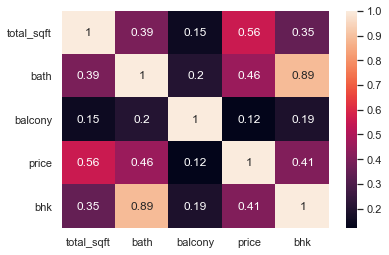

In [23]:
correlation = Data.corr()
sb.heatmap(correlation , xticklabels = correlation.columns , yticklabels = correlation.columns , annot = True)

In [24]:
Data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [25]:
Data['balcony'].unique()

array([1., 3., 2., 0.])

In [26]:
Data['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [27]:
# "bath" and "bhk" columns are highly correlated, we need to drop one of them
Data.drop(columns=['bath'], inplace=True)

In [28]:
Data.head()

,location,size,total_sqft,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,1.0,51.00,2


In [29]:
# finding price per sq.ft

Data['price_per_sqft'] = Data['price']*100000 / Data['total_sqft']

In [30]:
Data['price_per_sqft'] = Data['price_per_sqft'].round(2)
Data['price_per_sqft']

0         3699.81
1         4615.38
2         4305.56
3         6245.89
4         4250.00
           ...   
13314     6530.61
13315     6689.83
13317     5258.55
13318    10407.34
13319     3090.91
Name: price_per_sqft, Length: 12710, dtype: float64

In [31]:
Data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12668.000000,12710.000000,12710.000000,12710.000000,1.266800e+04
mean,1511.835167,1.584343,106.060778,2.737136,6.876277e+03
std,1162.097276,0.817287,131.766089,1.205097,2.263354e+04
min,5.000000,0.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,1.000000,49.030000,2.000000,4.242720e+03
50%,1260.000000,2.000000,70.000000,3.000000,5.376340e+03
75%,1640.000000,2.000000,115.000000,3.000000,7.142860e+03
max,52272.000000,3.000000,2912.000000,43.000000,2.300000e+06


In [32]:
Data['location'] = Data['location'].apply(lambda x: x.strip())
location_count = Data['location'].value_counts()

In [33]:
location_count

Whitefield                         515
Sarjapur  Road                     372
Electronic City                    302
Kanakpura Road                     261
Thanisandra                        234
                                  ... 
Sector 3 HSR Layout                  1
Chikkagubbi                          1
Mukkutam Nagar                       1
Fraser town                          1
Kengeri Satellite Town Stage II      1
Name: location, Length: 1254, dtype: int64

In [34]:
location_cnt_less_10 = location_count[location_count <= 10]
location_cnt_less_10 

Naganathapura                      10
Dairy Circle                       10
Kalkere                            10
1st Block Koramangala              10
Nagappa Reddy Layout               10
                                   ..
Sector 3 HSR Layout                 1
Chikkagubbi                         1
Mukkutam Nagar                      1
Fraser town                         1
Kengeri Satellite Town Stage II     1
Name: location, Length: 1017, dtype: int64

In [35]:
Data['location'] = Data['location'].apply(lambda x: 'other' if x in location_cnt_less_10 else x)

In [36]:
Data['location'].value_counts()

other               2739
Whitefield           515
Sarjapur  Road       372
Electronic City      302
Kanakpura Road       261
                    ... 
Tindlu                11
Nagasandra            11
Thyagaraja Nagar      11
LB Shastri Nagar      11
Banjara Layout        11
Name: location, Length: 238, dtype: int64

### Removing Outliers

In [37]:
Data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12668.000000,12710.000000,12710.000000,12710.000000,1.266800e+04
mean,1511.835167,1.584343,106.060778,2.737136,6.876277e+03
std,1162.097276,0.817287,131.766089,1.205097,2.263354e+04
min,5.000000,0.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,1.000000,49.030000,2.000000,4.242720e+03
50%,1260.000000,2.000000,70.000000,3.000000,5.376340e+03
75%,1640.000000,2.000000,115.000000,3.000000,7.142860e+03
max,52272.000000,3.000000,2912.000000,43.000000,2.300000e+06


In [38]:
# Removing outliers from "total_sqft" column
(Data['total_sqft']/Data['bhk']).describe()

count    12668.000000
mean       570.060291
std        380.298999
min          0.714286
25%        473.333333
50%        550.000000
75%        622.500000
max      26136.000000
dtype: float64

In [39]:
Data = Data[((Data['total_sqft']/Data['bhk']) >= 300)]
Data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12013.000000,12013.000000,12013.000000,12013.000000,12013.000000
mean,1542.315982,1.587613,105.003648,2.607259,6206.082361
std,1181.094228,0.808867,134.205666,0.922985,3985.518849
min,300.000000,0.000000,9.000000,1.000000,267.830000
25%,1107.000000,1.000000,48.450000,2.000000,4199.360000
50%,1285.000000,2.000000,68.000000,2.000000,5252.530000
75%,1660.000000,2.000000,110.000000,3.000000,6823.530000
max,52272.000000,3.000000,2912.000000,13.000000,176470.590000


In [40]:
Data.shape

(12013, 7)

In [41]:
Data.price_per_sqft.describe()

count     12013.000000
mean       6206.082361
std        3985.518849
min         267.830000
25%        4199.360000
50%        5252.530000
75%        6823.530000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [45]:
# removing the outlier from "price_per_sqft" column
q = Data['price_per_sqft'].quantile(0.99)
data_1 = Data[Data['price_per_sqft'] < q]
data_1.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,11892.000000,11892.000000,11892.000000,11892.000000,11892.000000
mean,1529.214625,1.586865,98.261674,2.593508,5977.170620
std,1162.286734,0.807795,102.325976,0.907505,2868.665841
min,300.000000,0.000000,9.000000,1.000000,267.830000
25%,1105.000000,1.000000,48.000000,2.000000,4189.640000
50%,1280.000000,2.000000,68.000000,2.000000,5233.565000
75%,1650.000000,2.000000,110.000000,3.000000,6760.560000
max,52272.000000,3.000000,2200.000000,13.000000,20645.160000


In [46]:
Data.bhk.describe()

count    12013.000000
mean         2.607259
std          0.922985
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: bhk, dtype: float64

In [51]:
# Removing outliers or invalid data points from "bhk" column

def bhk_outliers(df):
    exclude_indices = np.array([])   # creating an empty array which will carry all the values we need to remove
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:    # checking for threshold no. of data points to get accurate mean
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices , axis='index')

In [54]:
data = bhk_outliers(Data)
data.shape

(8320, 7)

In [55]:
data.head()

,location,size,total_sqft,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,1.0,51.00,2,4250.00


In [56]:
# Removing columns which are not necessary for the model
data.drop(columns=['size' , 'price_per_sqft'] , inplace=True)

In [57]:
data.head()

,location,total_sqft,balcony,price,bhk
0,Electronic City Phase II,1056.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,3.0,120.00,4
2,Uttarahalli,1440.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,1.0,95.00,3
4,Kothanur,1200.0,1.0,51.00,2


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8320 entries, 0 to 8319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8320 non-null   int64  
 1   location    8320 non-null   object 
 2   total_sqft  8320 non-null   float64
 3   balcony     8320 non-null   float64
 4   price       8320 non-null   float64
 5   bhk         8320 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 390.1+ KB


In [58]:
data.to_csv("Cleaned_data.csv")

In [60]:
x = data.drop(columns = ['price']) # independent features
y = data['price']  # feature which we are predicting through the model

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [67]:
print(x_train.shape)
print(x_test.shape)

(6656, 4)
(1664, 4)


## Model 1: Linear Regression

In [68]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['location']), remainder = 'passthrough')

In [69]:
scaler = StandardScaler()

In [71]:
lr = LinearRegression(normalize=True)

In [72]:
pipe = make_pipeline(column_trans, scaler, lr)

In [73]:
pipe.fit(x_train, y_train)

C:\Users\ISHA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [74]:
y_pred_lr = pipe.predict(x_test)

In [75]:
r2_score(y_test, y_pred_lr)

0.7062146929253836

## Model 2: Lasso

In [76]:
lasso =Lasso()

In [77]:
pipe = make_pipeline(column_trans, scaler, lasso)

In [78]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [79]:
y_pred_lasso = pipe.predict(x_test)
r2_score(y_test, y_pred_lasso)

0.7064964807885676

## Model 3: Ridge

In [80]:
ridge =Ridge()

In [81]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [82]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [83]:
y_pred_ridge = pipe.predict(x_test)
r2_score(y_test, y_pred_ridge)

0.7062667131366189

In [84]:
print("Linear Regression: ", r2_score(y_test, y_pred_lr))
print("Lasso: ", r2_score(y_test, y_pred_lasso))
print("Ridge: ", r2_score(y_test, y_pred_ridge))

Linear Regression:  0.7062146929253836
Lasso:  0.7064964807885676
Ridge:  0.7062667131366189


In [85]:
import pickle

In [86]:
pickle.dump(pipe, open('RidgeModel.pkl' , 'wb'))